-  Collect Twitter data
-  Extract the tweet text and any metadata
-  Perform preprocessing of the text to allow for better application of NLP techniques.


In [1]:
import pandas as pd
import csv
import re
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from wordcloud import WordCloud
import nltk 
from nltk.tokenize.toktok import ToktokTokenizer
tokenizer = ToktokTokenizer()
from nltk.corpus import stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to C:\Users\SHIVAM
[nltk_data]     GUPTA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

<hr>

## Data Collection

In [2]:
import requests
import pandas as pd
import re
from dotenv import load_dotenv
import os

load_dotenv()

url = "https://twitter-api45.p.rapidapi.com/search.php"
query = input("Search your tweets")
querystring = {"query": query, "search_type": "Top"}

headers = {
    "x-rapidapi-key": os.getenv('X-RAPIDAPI-KEY'),
    "x-rapidapi-host": os.getenv('X-RAPIDAPI-HOST')
}

def fetch_tweets(querystring, headers, max_pages=200):
    all_tweets = []
    next_cursor = None
    page_count = 0
    
    while page_count < max_pages:
        if next_cursor:
            querystring['cursor'] = next_cursor  

        response = requests.get(url, headers=headers, params=querystring)
        json_data = response.json()

        tweets = json_data.get('timeline', [])
        all_tweets.extend(tweets)  

        next_cursor = json_data.get('next_cursor')
        
        if not next_cursor:
            break
        
        page_count += 1  

    return all_tweets

tweets = fetch_tweets(querystring, headers)

tweet_info = []
for tweet in tweets:
    tweet_id_str = tweet.get("tweet_id", "")
    date_time = tweet.get("created_at", "")
    
    user_info = tweet.get("user_info", {})
    location = user_info.get("location", "India")
    
    tweet_text = tweet.get("text", "")
    
    media = tweet.get("media", [])
    
    print(f"Tweet ID: {tweet_id_str}, Media: {media}")

    if isinstance(media, list):
        media_urls = [m.get("url") for m in media if isinstance(m, dict)]
    else:
        media_urls = []  
    
    media_content = ', '.join(media_urls)
    
    tweet_info.append([tweet_id_str, date_time, location, tweet_text, media_content])

df = pd.DataFrame(data=tweet_info, columns=['tweet_id_str', 'date_time', 'location', 'tweet_text', 'media_urls'])

print(df.head())

Tweet ID: 1844092588506349768, Media: {'photo': [{'media_url_https': 'https://pbs.twimg.com/media/GZeIb5XbcAEH0F7.jpg', 'id': '1844092585268441089', 'sizes': {'h': 1000, 'w': 1000}}]}
Tweet ID: 1844281344777724028, Media: {'photo': [{'media_url_https': 'https://pbs.twimg.com/media/GZg0GwfaAAITY-K.jpg', 'id': '1844281338108706818', 'sizes': {'h': 300, 'w': 400}}, {'media_url_https': 'https://pbs.twimg.com/media/GZg0GweaAAAEHU0.jpg', 'id': '1844281338104512512', 'sizes': {'h': 415, 'w': 739}}]}
Tweet ID: 1844294321736122741, Media: {'photo': [{'media_url_https': 'https://pbs.twimg.com/media/GZg_6SjaAAITPdA.jpg', 'id': '1844294318053523458', 'sizes': {'h': 1200, 'w': 1200}}]}
Tweet ID: 1843186838787526796, Media: {'photo': [{'media_url_https': 'https://pbs.twimg.com/media/GZRQp-HXwAAByD6.jpg', 'id': '1843186829480148992', 'sizes': {'h': 1080, 'w': 1080}}]}
Tweet ID: 1844230543921360910, Media: {'photo': [{'media_url_https': 'https://pbs.twimg.com/media/GZgF5r9bAAAeOhY.jpg', 'id': '1844230

In [11]:
for i, tweet in enumerate(df['tweet_text'].head(20)):
    print(i + 1, tweet, '\n')

1 india lost ratan ! institution , remembered generations come. om shanti. rest peace #ratantata 

2 honour spending time man inspired gave believe making society better place calling. kind humans animals alike hope us follow shadow .. miss #ratantata 

3 om shanti ... #ratantata 

4 thank thinking 

5 true gem mother india ! #ratantata 

6 say gone .. ' hard bear loss .. hard .. farewell friend .. #ratantata 

7 bharat lost real ratan. end era om shanti #ratantata 

8 moving tribute #ratantata 

9 #ratantata #rip 

10 loving memory true legend #ratantata 

11 remembering fondly. #ratantata 

12 words fall short today. mr. ratan tata ' profound humanity selfless compassion shall always inspire us. forever remembered beloved mentor. 

13 ratan tata ji personal hero mine , someone tried emulate throughout life. national treasure whose contributions nation building shall forever etched story modern india. true richness lay material wealth ethics , integrity , humility patriotism. immediat

Now let's print the text of the first 20 tweets to see if our query is working correctly.

In [12]:
def clean_text(text):
    """
    A function to clean the tweet text
    """
    # Remove hyperlinks
    text = re.sub(r'https?:\/\/\S+', ' ', text)
    
    # Remove @mentions
    text = re.sub(r'@[A-Za-z0-9]+', ' ', text)
    
    # Remove anything that isn't a letter, number, or one of the punctuation marks listed
    text = re.sub(r"[^A-Za-z0-9#'?!,.]+", ' ', text)   
    
    return text

# Apply the clean_text function to the 'tweet_text' column
df['tweet_text'] = df['tweet_text'].apply(clean_text)

In [13]:
for i, tweet in enumerate(df['tweet_text'].head(20)):
    print(i + 1, tweet, '\n')

df['tweet_text'] = df['tweet_text'].str.lower()
print(df.head())

1 india lost ratan ! institution , remembered generations come. om shanti. rest peace #ratantata 

2 honour spending time man inspired gave believe making society better place calling. kind humans animals alike hope us follow shadow .. miss #ratantata 

3 om shanti ... #ratantata 

4 thank thinking 

5 true gem mother india ! #ratantata 

6 say gone .. ' hard bear loss .. hard .. farewell friend .. #ratantata 

7 bharat lost real ratan. end era om shanti #ratantata 

8 moving tribute #ratantata 

9 #ratantata #rip 

10 loving memory true legend #ratantata 

11 remembering fondly. #ratantata 

12 words fall short today. mr. ratan tata ' profound humanity selfless compassion shall always inspire us. forever remembered beloved mentor. 

13 ratan tata ji personal hero mine , someone tried emulate throughout life. national treasure whose contributions nation building shall forever etched story modern india. true richness lay material wealth ethics , integrity , humility patriotism. immediat

<hr>

In [14]:
stopWords = stopwords.words("english")

In [15]:
def remove_stopwords(text):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    
    filtered_tokens = [token for token in tokens if token not in stopWords]
    filtered_text = ' '.join(filtered_tokens)    
    
    return filtered_text

In [16]:
df['tweet_text']=df['tweet_text'].apply(remove_stopwords)

for i,tweet in enumerate(df['tweet_text'].head(20)):
    print(i+1, tweet, '\n')

1 india lost ratan ! institution , remembered generations come. om shanti. rest peace #ratantata 

2 honour spending time man inspired gave believe making society better place calling. kind humans animals alike hope us follow shadow .. miss #ratantata 

3 om shanti ... #ratantata 

4 thank thinking 

5 true gem mother india ! #ratantata 

6 say gone .. ' hard bear loss .. hard .. farewell friend .. #ratantata 

7 bharat lost real ratan. end era om shanti #ratantata 

8 moving tribute #ratantata 

9 #ratantata #rip 

10 loving memory true legend #ratantata 

11 remembering fondly. #ratantata 

12 words fall short today. mr. ratan tata ' profound humanity selfless compassion shall always inspire us. forever remembered beloved mentor . 

13 ratan tata ji personal hero mine , someone tried emulate throughout life. national treasure whose contributions nation building shall forever etched story modern india. true richness lay material wealth ethics , integrity , humility patriotism. immedia

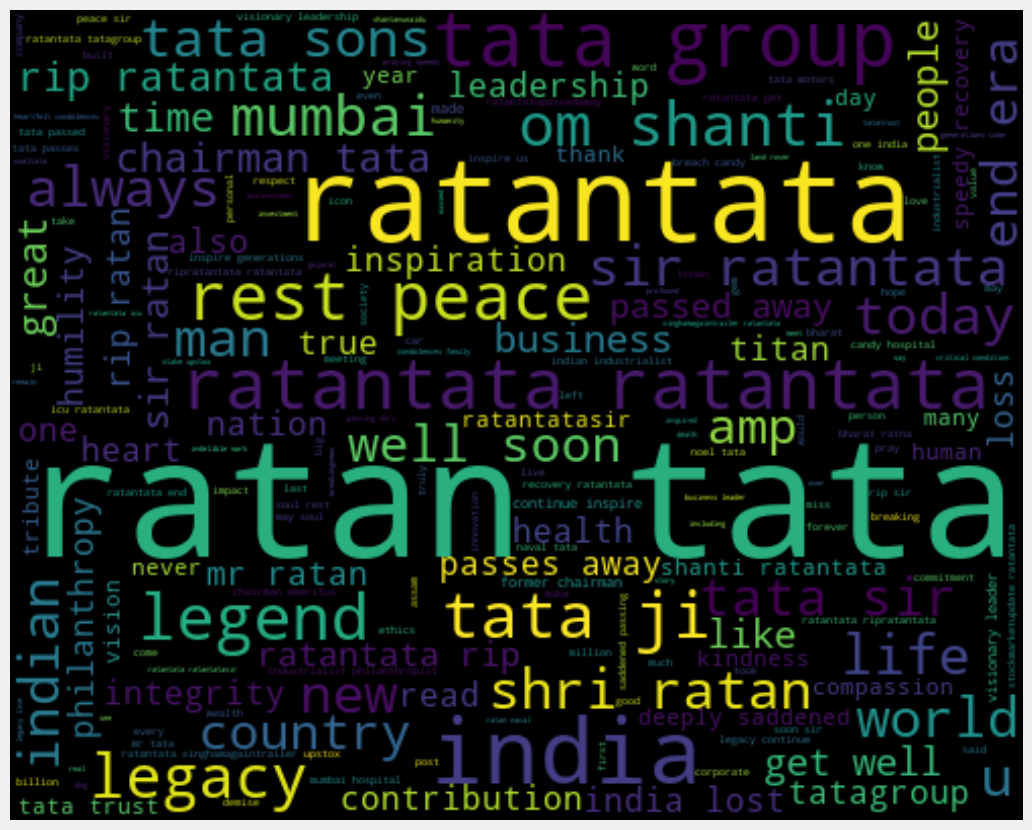

In [17]:
all_words = ' '.join( [data for data in df['tweet_text']])
word_cloud = WordCloud(width=500, height=400, random_state=21, max_font_size = 100,
                       stopwords=stopWords).generate(all_words)

plt.figure(figsize = (20,10))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [18]:
# Save the DataFrame to a CSV file
df.to_csv('../data/tweets_data.csv', index=False)
print("Data saved to 'tweets_data.csv'")

Data saved to 'tweets_data.csv'


<hr>